# Clase 11: Importa y entiende la base

## El problema a resolver

* Acá el problema que resolverás es diferente al del módulo anterior: este es una **clasificación**

* Tu objetivo es pronosticar y decidir si a alguien le aprobarías una tarjeta de crédito

* Esta es una de las aplicaciones más comunes: una enorme cantidad de los desarrollos de Machine Learning se han dado en el sector bancario, y las áreas de riesgo han y siguen siendo claves en las transformaciones
    
    * Esto también se utiliza en muchas Fintechs y startups financieras

In [1]:
# como siempre, importa las librerías desde el principio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Importa los datos

* Importar la base de datos: esta vez no desde Scikit learn

* ¿Qué son los títulos de las variables?
    * Es común encontrar esto en ejercicios (Hackatons, o cursos)
    * En la práctica es menos común, aunque igual no siempre es clara la definición (documentación escasa, definición de negocio incierta)
    
* Cambiar los nombres de las variables por facilidad

In [2]:
tc_data = pd.read_csv("crx.data") # revisa nombre y que el archivo esté

In [3]:
tc_data

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


* Dos cosas saltan a la vista en esta base de datos:
    * Nota que tiene tanto valores numéricos como no numéricos
    * Es difícil entender los nombres de las variables

In [4]:
# revisa los nombres de las variables predictoras
tc_data.columns

Index(['b', '30.83', '0', 'u', 'g', 'w', 'v', '1.25', 't', 't.1', '01', 'f',
       'g.1', '00202', '0.1', '+'],
      dtype='object')

* Los nombres están efectivamente en diferentes formatos y nombres que no tienen mucho sentido. ¿Por qué?

* Como siempre, revisa la fuente de tus datos lo más que puedas. En este caso, no hay documentación directa en la misma base, por lo que es importante revisar la fuente:
    * https://archive.ics.uci.edu/ml/datasets/credit+approval
    
* ¡La base de datos tuvo que ser anonimizada para ser publicada! Las fuentes de información corporativa (y particularmente financiera) no son fáciles de encontrar, pues hay restricciones tanto legales como éticas

## Cambia los nombres de las variables

* Este paso no es estrictamente necesario, pero tener nombres familiares de las variables te puede ayudar en la intuición y facilidad al escribir el código

* En la práctica, entender las variables, sus nombres y definiciones, requiere mucha comunicación con los expertos en el problema particular a resolver

* Un análisis de estas variables se encuentra en 
http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html

In [5]:
# diccionario con nombres
nuevas_variables = {
    "b": "genero",
    "30.83": "edad",
    "0": "deuda",
    "u": "estado_civil",
    "g": "cliente",
    "w": "educacion",
    "v": "etnia",
    "1.25": "años_empleado",
    "t": "no_pago",
    "t.1": "empleado",
    "01": "score_crediticio",
    "f": "licencia_conduccion",
    "g.1": "ciudadania",
    "00202": "zip",
    "0.1": "ingreso",
    "+": "tarjeta_aprobada"
}

In [8]:
# usa el diccionario para renombrar las variables
tc_data = tc_data.rename(columns=nuevas_variables)

In [9]:
# revisa cómo están los datos
tc_data

,genero,edad,deuda,estado_civil,cliente,educacion,etnia,años_empleado,no_pago,empleado,score_crediticio,licencia_conduccion,ciudadania,zip,ingreso,tarjeta_aprobada
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


# Clase 12: Prepara los datos 1

* En esta clase realizarás el procesamiento de datos necesarios para hacer un modelo de pronóstico

* Notarás que diferentes tipos de variables como categóricas y numéricas, tienen tratamientos diferentes

* Principalmente, este procesamiento se encarga de manejar los valores no reportados

* ¿Por qué es relevante? ¿No puedo simplemente ignorar la información?
    * No tratarlos de manera adecuada implica en algunos casos perder información valiosa (se pierde toda la observación, no sólo la variable no reportada)

* Empieza con unas estadísticas rápidas para las variables que estás catalogadas como numéricas

## Variables numéricas

In [10]:
# estadísticas para variables numéricas
tc_data.describe()

,deuda,años_empleado,score_crediticio,ingreso
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


* Esto parece indicar que sólo hay cuatro columnas con valores numéricos
    * Puede ocurrir que variables que deberían ser numéricas, sean leídas como categóricas, pero es una primera aproximación

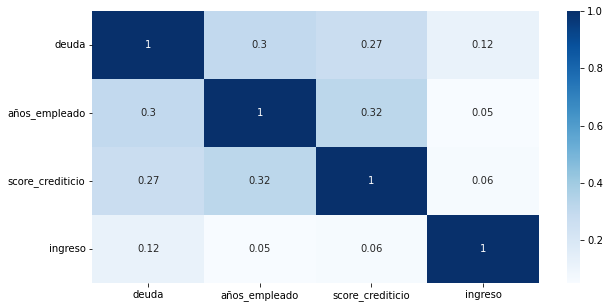

In [11]:
# grafica la correlación entre variables numéricas
plt.figure(figsize=(10,5))
ax = plt.subplot()
g = sn.heatmap(tc_data.corr().round(2), annot=True, cmap = 'Blues')

* Otra forma de visualizar información para todas las columnas es a través del método "info"

* Revisa que esta información sea consistente con la información anterior

In [12]:
# revisa valores y tipo de cada variable
print(tc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   genero               689 non-null    object 
 1   edad                 689 non-null    object 
 2   deuda                689 non-null    float64
 3   estado_civil         689 non-null    object 
 4   cliente              689 non-null    object 
 5   educacion            689 non-null    object 
 6   etnia                689 non-null    object 
 7   años_empleado        689 non-null    float64
 8   no_pago              689 non-null    object 
 9   empleado             689 non-null    object 
 10  score_crediticio     689 non-null    int64  
 11  licencia_conduccion  689 non-null    object 
 12  ciudadania           689 non-null    object 
 13  zip                  689 non-null    object 
 14  ingreso              689 non-null    int64  
 15  tarjeta_aprobada     689 non-null    obj

* Observa que todas las columnas están "llenas" con la totalidad de los 689 observaciones ("non-null")
    * ¡Pero no te confíes! Puede haber otro tipo de valores no reportados que inicialmente no se ven

## Detecta Valores no reportados

* Revisa cada uno de los valores que tiene cada variable
    * Ya viste que no hay valores formalmente no reportados, pero revisa algún otro patrón particular
    * Columnas con variables de diferentes tipos o como cadenas ("strings") son reportadas como "object"

In [13]:
# imprime todos los valores únicos de cada columna
for col in tc_data.columns:
    print(col)
    print(pd.unique(tc_data[col]))
    print()

genero
['a' 'b' '?']

edad
['58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42' '42.50'
 '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25' '21.83'
 '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58' '57.42'
 '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00' '27.75'
 '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00' '31.92'
 '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33' '23.17'
 '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67' '36.00'
 '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67' '34.08'
 '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67' '34.00'
 '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50' '37.50'
 '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75' '25.42'
 '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50' '47.67'
 '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58' '33.58'
 '18.83' '26.92' '31.25' '56

In [14]:
# imprime todos los valores únicos de cada columna categórica
for col in tc_data.columns:
    if tc_data[col].dtype == 'object':
        print(col)
        print(pd.unique(tc_data[col]))
        print()

genero
['a' 'b' '?']

edad
['58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42' '42.50'
 '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25' '21.83'
 '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58' '57.42'
 '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00' '27.75'
 '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00' '31.92'
 '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33' '23.17'
 '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67' '36.00'
 '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67' '34.08'
 '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67' '34.00'
 '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50' '37.50'
 '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75' '25.42'
 '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50' '47.67'
 '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58' '33.58'
 '18.83' '26.92' '31.25' '56

* Primero, observarás que hay dos variables que parecieran ser numéricas, pero se encuentran como categóricas. ¿Por qué?
    * Observa los signos de interrogación. Al ser caracteres no numéricos, hace que las variables contengan dos tipos de variables
    
* Podría ser que "?" representa una categoría particular de alguna variable (por ejemplo, "género" podría reportar géneros más allá que hombre y mujer. Pero al estar en varias variables, es razonable interpretarlo como una forma de valor que fue incorrectamente reportado
  
* NOTA: el notebook de Jupyter tiene visualizaciones por defecto que ayudan a navegar de forma sencilla resultados muy largos

## Formato de no reportados

* Una forma útil de marcar los "no reportados" es con el "NAN" de numpy

* Permite estandarizar el formato y acceder a funciones nativas para su tratamiento

In [15]:
# Reemplaza los '?'s con NaN
tc_data = tc_data.replace('?', np.nan) # We do this to replace the nan values with other values later on!

* Es buena práctica asegurarse que el código tuvo el efecto esperado

In [17]:
# imprime todos los valores únicos de cada columna categórica

for col in tc_data.columns: # todas las columnas
    if tc_data[col].dtype == "object": # sólo columnas categóricas
        print(col)
        print(pd.unique(tc_data[col])) # ver valores únicos
        print() # para facilitar visualización

genero
['a' 'b' nan]

edad
['58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42' '42.50'
 '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25' '21.83'
 '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58' '57.42'
 '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00' '27.75'
 '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00' '31.92'
 '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33' '23.17'
 '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67' '36.00'
 '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67' '34.08'
 '21.67' '21.50' '49.58' '27.67' '39.83' nan '37.17' '25.67' '34.00'
 '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50' '37.50'
 '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75' '25.42'
 '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50' '47.67'
 '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58' '33.58'
 '18.83' '26.92' '31.25' '56

* Observa que ya no existen signos de interrogación, sino que son "Nan": "not a number" o la forma de numpy de reportar valores no reportados


## Imputar con la media (numéricos)

* Aunque anteriormente habías visto que no habían números nulos, esta técnica te servirá en otros proyectos

* Para no perder la información, imputar implica asumir un valor de la variable no reportada
    * Una forma muy utilizada, es darle el valor promedio de la variable

In [18]:
# Imputar los no reportados con el promedio
tc_data.fillna(tc_data.mean(), inplace=True)

C:\Users\adria\AppData\Local\Temp/ipykernel_7216/543501607.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tc_data.fillna(tc_data.mean(), inplace=True)


In [19]:
# Verifica que las variables numéricas no tengan NAN
print(tc_data.isnull().sum())

genero                 12
edad                   12
deuda                   0
estado_civil            6
cliente                 6
educacion               9
etnia                   9
años_empleado           0
no_pago                 0
empleado                0
score_crediticio        0
licencia_conduccion     0
ciudadania              0
zip                    13
ingreso                 0
tarjeta_aprobada        0
dtype: int64


* Nota que la imputación hecha arriba fue hecha tomando en cuenta el promedio. Esto no tiene sentido para variables categóricas

* Por esto, es necesario usar otro método para las categóricas

## Imputar con los más frecuentes (categóricos)

In [20]:
# imputar con el valor más frecuente los valores no reportados en las variables categóricas

for col in tc_data.columns: # cada columna

    if tc_data[col].dtypes == 'object': # variables categóricas
        # Imputar valor más frecuente
        tc_data = tc_data.fillna(tc_data[col].value_counts().index[0]) # We fill the nan values with the categorical mode.

In [21]:
# revisar total de NANs por variable
print(tc_data.isnull().sum())

genero                 0
edad                   0
deuda                  0
estado_civil           0
cliente                0
educacion              0
etnia                  0
años_empleado          0
no_pago                0
empleado               0
score_crediticio       0
licencia_conduccion    0
ciudadania             0
zip                    0
ingreso                0
tarjeta_aprobada       0
dtype: int64


* Con esto has terminado las preparación de datos inicial, enfocada principalmente en valores no reportados e imputaciones

* En la siguiente clase harás otras transformaciones de datos necesarias, como separar los datos en entrenamiento y test y "label encoding" o transformación a variables dummy

# Clase 13: Prepara los datos 2

## Elimina algunas variables ("Feature Selection")

* Este paso se realiza generalmente basado en la intuición, facilidad de implementación, conocimiento de negocio o después de iterar algunos modelos

* En este caso, los códigos postales requieren un tratamiento especial para generar buen poder predictivo, como asociar cada código a zonas puntuales. Esto complica el ejercicio, y para este caso lo dejaremos de lado

* Intuitivamente, la licencia de conducción no parecería tener relación con aprobaciones de tarjetas de crédito

In [22]:
# elimina dos variables
tc_data = tc_data.drop(['licencia_conduccion', 'zip'], axis=1)

In [23]:
tc_data.columns

Index(['genero', 'edad', 'deuda', 'estado_civil', 'cliente', 'educacion',
       'etnia', 'años_empleado', 'no_pago', 'empleado', 'score_crediticio',
       'ciudadania', 'ingreso', 'tarjeta_aprobada'],
      dtype='object')

In [24]:
tc_data

,genero,edad,deuda,estado_civil,cliente,educacion,etnia,años_empleado,no_pago,empleado,score_crediticio,ciudadania,ingreso,tarjeta_aprobada
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,g,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


In [25]:
tc_data.columns.values

array(['genero', 'edad', 'deuda', 'estado_civil', 'cliente', 'educacion',
       'etnia', 'años_empleado', 'no_pago', 'empleado',
       'score_crediticio', 'ciudadania', 'ingreso', 'tarjeta_aprobada'],
      dtype=object)

## No numéricos a numéricos (Label Encoding)

* Aparte de valores no reportados, al trabajar con variables categóricas es muy importante pasar la misma información a representaciones numéricas
    * Los principales algoritmos de predicción requieren este formato

In [28]:
# Instanciar el Label Encoder
le = LabelEncoder()

# hacer la transformación numérica para cada variable categórica

for col in tc_data.columns.values: # .values transforma el Index en un array

    if tc_data[col].dtype == 'object': # variables categóricas
    # Usar el Label Encoder para hacer la transformación numérica
        tc_data[col]= le.fit_transform(tc_data[col])


In [33]:
tc_data

,genero,edad,deuda,estado_civil,cliente,educacion,etnia,años_empleado,no_pago,empleado,score_crediticio,ciudadania,ingreso,tarjeta_aprobada
0,0,327,4.460,2,1,11,4,3.04,1,1,6,0,560,0
1,0,89,0.500,2,1,11,4,1.50,1,0,0,0,824,0
2,1,125,1.540,2,1,13,8,3.75,1,1,5,0,3,0
3,1,43,5.625,2,1,13,8,1.71,1,0,0,2,0,0
4,1,167,4.000,2,1,10,8,2.50,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,52,10.085,3,3,5,4,1.25,0,0,0,0,0,1
685,0,71,0.750,2,1,2,8,2.00,0,1,2,0,394,1
686,0,97,13.500,3,3,6,3,2.00,0,1,1,0,1,1
687,1,20,0.205,2,1,0,8,0.04,0,0,0,0,750,1


* Observa este resultado y compáralo con los datos antes de esta transformación. Verás que todas las categorías son numéricas, y las funciones de scikit learn te permitió hacerlo en muy pocas líneas de código

In [34]:
# revisa el tipo de variables después de la codificación
tc_data.dtypes

genero                int32
edad                  int32
deuda               float64
estado_civil          int32
cliente               int32
educacion             int32
etnia                 int32
años_empleado       float64
no_pago               int32
empleado              int32
score_crediticio      int64
ciudadania            int32
ingreso               int64
tarjeta_aprobada      int32
dtype: object

* Nota que todas las variables ahora son numéricas

* Este método es útil para variable categóricas que tiene una escala de orden: por ejemplo, categorías Junior, Senior y Experto. Pero en las que no tienen orden (hombre o mujer), es mejor separarlas en variables dummies (one hot encoding)

## "One Hot Encoding"

* El primer paso es seleccionar las variables que queremos codificar y añadir el tipo deseado. En este caso, para las categóricas, selecciona "str"

* Convertir a tipo "object" las variables para "one hot" encoding es necesario para obtener las dummies

In [44]:
# variables para one-hot encoding
dummy_vars = {"genero": str,
              "estado_civil": str,
              "cliente": str,
              "etnia": str,
              "no_pago": str,
              "empleado": str,
              "ciudadania": object} # en vez de str puedo ponerle object y funciona igual :D

In [45]:
# convierte las variables seleccionadas a categóricas
tc_data = tc_data.astype(dummy_vars) # astype te permite cambiar el type de cada Series


In [47]:
tc_data.dtypes

genero               object
edad                  int32
deuda               float64
estado_civil         object
cliente              object
educacion             int32
etnia                object
años_empleado       float64
no_pago              object
empleado             object
score_crediticio      int64
ciudadania           object
ingreso               int64
tarjeta_aprobada      int32
dtype: object

* Ahora vas a separar las variables seleccionadas en variables nuevas, una por cada categoría

* Es vital eliminar una categoría en cada variable para evitar problemas de colinearidad, para esto se usa drop_first

In [52]:
# crear las nuevas variables dummies
tc_data = pd.get_dummies(tc_data, drop_first=True) #drop_first hace que una columna se borre para evitar redundancia

In [54]:
tc_data # verifica

,edad,deuda,educacion,años_empleado,score_crediticio,ingreso,tarjeta_aprobada,genero_1,estado_civil_1,estado_civil_2,...,etnia_4,etnia_5,etnia_6,etnia_7,etnia_8,etnia_9,no_pago_1,empleado_1,ciudadania_1,ciudadania_2
0,327,4.460,11,3.04,6,560,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,89,0.500,11,1.50,0,824,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,125,1.540,13,3.75,5,3,0,1,0,1,...,0,0,0,0,1,0,1,1,0,0
3,43,5.625,13,1.71,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
4,167,4.000,10,2.50,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,10.085,5,1.25,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
685,71,0.750,2,2.00,2,394,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
686,97,13.500,6,2.00,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
687,20,0.205,0,0.04,0,750,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


* Nota que las variables con diferentes categorías (por ejemplo etnia) ahora incluyen sólo valores entre cero y uno

* La categoría "0" ha sido borrada para todas. Esto evitar problema con predicciones posteriores

## Reorganización para facilidad

* Este paso no es necesario, pero te recomiendo que si tienes el tiempo en tus proyectos, trates de dejar la información los más organizada posible. ¡Ayudará a tu yo del futuro!

* Acá sólo pasarás la columna objetivo al final del dataframe

In [64]:
# copia el target en la última columna
tc_data["ultima"] = tc_data["tarjeta_aprobada"]

# elimina la columna inicial del target
tc_data = tc_data.drop("tarjeta_aprobada", axis=1)

# nómbrala nuevamente para facilidad
tc_data.rename(columns={"ultima": "tc_aprobada"}, inplace=True) # inplace=True creates a new DF instead of changing the same one

tc_data # como siempre, checkea

,edad,deuda,educacion,años_empleado,score_crediticio,ingreso,genero_1,estado_civil_1,estado_civil_2,estado_civil_3,...,etnia_5,etnia_6,etnia_7,etnia_8,etnia_9,no_pago_1,empleado_1,ciudadania_1,ciudadania_2,tc_aprobada
0,327,4.460,11,3.04,6,560,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1,89,0.500,11,1.50,0,824,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,125,1.540,13,3.75,5,3,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,43,5.625,13,1.71,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,167,4.000,10,2.50,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,10.085,5,1.25,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
685,71,0.750,2,2.00,2,394,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
686,97,13.500,6,2.00,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
687,20,0.205,0,0.04,0,750,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [65]:
tc_data.columns

Index(['edad', 'deuda', 'educacion', 'años_empleado', 'score_crediticio',
       'ingreso', 'genero_1', 'estado_civil_1', 'estado_civil_2',
       'estado_civil_3', 'cliente_1', 'cliente_2', 'cliente_3', 'etnia_1',
       'etnia_2', 'etnia_3', 'etnia_4', 'etnia_5', 'etnia_6', 'etnia_7',
       'etnia_8', 'etnia_9', 'no_pago_1', 'empleado_1', 'ciudadania_1',
       'ciudadania_2', 'tc_aprobada'],
      dtype='object')

# Clase 14: Últimos pasos y evaluación

* En esta clase haremos los últimos pasos de preparación de datos, que son dividir los datos en entrenamiento y test, seguido de escalar las variables numéricas, para finalizar con el modelo de pronóstico y evaluación

## Trains y test

* Los algoritmos de scikit learn requieren que los datos estén en formatos de numpy

In [66]:
# convierte tu dataframe a arreglos de numpy
tc_data = tc_data.values

In [67]:
tc_data # comprueba nuevo formato numpy

array([[3.270e+02, 4.460e+00, 1.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.900e+01, 5.000e-01, 1.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.250e+02, 1.540e+00, 1.300e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [9.700e+01, 1.350e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+01, 2.050e-01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.960e+02, 3.375e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [68]:
# separa variable explicativas de la variable objetivo
X,y = tc_data[:,0:25] , tc_data[:,26]

# separa en datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=1) # el reporte se hace con los datos del test

* Es bueno comprobar la forma de cada nueva variables

In [70]:
X_train.shape

(461, 25)

In [71]:
X_test.shape

(228, 25)

In [72]:
y_train.shape

(461,)

In [73]:
y_test.shape

(228,)

* Recuerda que tu problema objetivo es clasificar si un crédito va a ser aprobado o no. Según la documentación de la base de datos, la variables objetivo contiene 383 (55.5%) aplicaciones negadas y 307 (44.5%) aprobadas

* Comprueba si estos valores son ciertos

In [74]:
# aplicaciones no aprobadas
np.count_nonzero(y)

383

In [75]:
# aplicaciones aprobadas
y.size - np.count_nonzero(y)

306

## Escalar las variables numéricas

* Tu variable objetivo es si la tarjeta fue aprobada o no, la cual está entre cero y uno

* Pero variables explicativas numéricas tienen rangos muy variados. Esto puede "confundir" a los algoritmos de predicción

* Es necesario reescalar las variables para que estén en el mismo rango

In [78]:
# recuerda los rangos actuales
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,...,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,149.637744,4.930315,6.594360,2.291757,2.208243,1026.229935,0.687636,0.004338,0.737527,0.247289,...,0.069414,0.212581,0.010846,0.004338,0.002169,0.579176,0.013015,0.520607,0.414317,0.013015
std,95.642001,4.952237,4.463169,3.510664,4.107260,5932.273575,0.463961,0.065795,0.440456,0.431905,...,0.254433,0.409578,0.103690,0.065795,0.046575,0.494228,0.113462,0.500118,0.493139,0.113462
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,1.080000,2.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,135.000000,3.000000,6.000000,1.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,220.000000,8.000000,11.000000,2.750000,2.000000,316.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,348.000000,28.000000,14.000000,28.500000,40.000000,100000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* ¡El valor máximo de las variables numéricas es muy variado!

In [79]:
# Reescalar X_train y X_test

scaler = MinMaxScaler(feature_range=(0,1)) # instanciar
rescaledX_train = scaler.fit_transform(X_train) # reescalar X de entrenamiento
rescaledX_test = scaler.fit_transform(X_test) # reescalar X de test

In [80]:
# revisa que los rangos de X_train reescalado sean entre 0 y 1
pd.DataFrame(rescaledX_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,...,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,0.428351,0.176083,0.471026,0.080413,0.055206,0.010262,0.687636,0.004338,0.737527,0.247289,...,0.069414,0.212581,0.010846,0.004338,0.002169,0.579176,0.013015,0.520607,0.414317,0.013015
std,0.275625,0.176866,0.318798,0.123181,0.102681,0.059323,0.463961,0.065795,0.440456,0.431905,...,0.254433,0.409578,0.103690,0.065795,0.046575,0.494228,0.113462,0.500118,0.493139,0.113462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.201729,0.038571,0.142857,0.005789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.386167,0.107143,0.428571,0.035088,0.000000,0.000030,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.631124,0.285714,0.785714,0.096491,0.050000,0.003160,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
# revisa que los rangos de X_test reescalado sean entre 0 y 1
pd.DataFrame(rescaledX_test).describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,0.433845,0.168318,0.471805,0.139298,0.041699,0.032091,0.710526,0.0,0.780702,0.214912,...,0.109649,0.175439,0.013158,0.008772,0.004386,0.574561,0.008772,0.526316,0.451754,0.008772
std,0.277044,0.190830,0.307554,0.199835,0.091221,0.106366,0.454516,0.0,0.414681,0.411665,...,0.313139,0.381179,0.114201,0.093452,0.066227,0.495497,0.093452,0.500406,0.498762,0.093452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.203305,0.031137,0.142857,0.016667,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.357759,0.085438,0.428571,0.066667,0.000000,0.000320,1.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.660920,0.246820,0.714286,0.168750,0.044776,0.016486,1.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Ha sido una larga transformación de datos. En la práctica, la mayoría del tiempo de los Científicos de Datos se pasa arreglando datos en vez de generando las predicciones

* Veamos en nuestra siguiente clase cómo hacer las predicciones y evaluar el modelo de clasificación

## Regresión Logística

In [83]:
# Instanciar un clasificador de Regresión Logística
logreg = LogisticRegression()

# Ajustar una regresión a los datos de entrenamiento
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

* Como ves, el arduo trabajo es la preparación de los datos. El entrenamiento del modelo para la generación de los modelos, es realmente sencillo si toda la preparación es clara.

* Esto se debe principalmente a los grandes avances en los algoritmos de estimación y la fortaleza de herramientas como Python y herramientas de libre acceso. ¡Estamos parados en hombros de gigantes!

## Evaluación del modelo

* En problemas de clasificación, la matriz de confusión es una herramienta fundamental para la evaluación del modelo

* Esta matriz muestra el número de clasificaciones correctas para cada categoría

* En este caso, evaluaremos el modelo con la métrica "precisión", que indica en las dos categorías, cuántos aciertos tuvo el modelo

<AxesSubplot:>

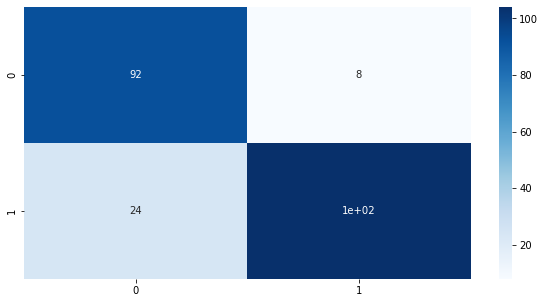

In [84]:
# Usa logreg para predecir aplicaciones de los datos de test
y_pronostico = logreg.predict(rescaledX_test)

# Matriz de confusión para el modelo logreg
matriz_conf = confusion_matrix(y_test, y_pronostico)

plt.figure(figsize=(10, 5))
ax = plt.subplot()
sn.heatmap(matriz_conf, annot=True, ax = ax, cmap='Blues')

* Para calcular la precisión, sólo divide el número de aciertos del modelo sobre el total de predicciones realizadas

In [87]:
(102 + 92) / (102 + 92 + 8 + 24)

0.8584070796460177

* Esta y otras métricas, se pueden calcular directamente en scikit learn

In [88]:
# evalúa el modelo en los datos de entrenamiento
print("Precisión del clasificador de regresión logística en entrenamiento: ", logreg.score(rescaledX_train, y_train))

Precisión del clasificador de regresión logística en entrenamiento:  0.8655097613882863


* Recuerda que el desempeño del modelo en entrenamiento no se reporta como desempeño final del modelo

* Las métricas en entrenamiento son utilizadas para otros fines, como identificar potenciales caminos para mejorar el modelo, pero nunca como resultado final

In [89]:
# Evalúa la precisión en test
print("Precisión del clasificador de regresión logística en test: ", logreg.score(rescaledX_test, y_test))

Precisión del clasificador de regresión logística en test:  0.8596491228070176


* No es inusual que el desempeño en entrenamiento sea mayor al desempeño de test, debido a que los datos en test son totalmente nuevos y no fueron utilizados para la construcción del modelo

* ¡Y ya tienes tu un modelo de clasificación! ¡Felicitaciones!

* En nuestra siguiente clase, te mostraré el ejercicio de este módulo.

# Clase 15: Proyecto

El objetivo en este proyecto es que explores lo que se conoce como los hiperparámetros de los modelos, escogiendo diferentes valores y revisando si estos pueden mejorar el desempeño o poder predictivo del modelo

Deberás utilizar todo el código que has construído hasta acá siguiendo las clases de todo el módulo.

El ejercicio consiste en completar de forma correcta el código

Verás la estructura principal, pero deberás buscar la documentación de las funciones y entender los parámetros necesarios para poder llenarlos correctamente

* El ajuste de hiperparámetros consiste en estimar automáticamente varios modelos cambiando valores específicos de los algoritmos

* A continuación, deberás varias los parámetros "tol" y "max_iter" de la regresión logística para estimar varias combinaciones de parámetros y encontrar el modelo que tenga mayor precisión

* El objeto "GridSeachCV" de scikit learn es clave para este ejercicio

* Empieza por importar GridsearchCV

In [90]:
# TODO: Importa el módulo de sklearn "GridSearchCV"

from sklearn.model_selection import GridSearchCV


* Ahora define los parámetros a explorar
* Crea dos listas de python "tol" y "max_iter", con los valores 0.01, 0.001, 0.0001 para "tol", y con 150, 200, 300, 1000 para "max_iter"

In [91]:
# TODO: Define las dos listas (dos líneas de código)
tol = [0.01, 0.001, 0.0001]
max_iter = [150, 200, 300, 1000]


In [95]:
# Crea un diccionario con dos llaves donde tol y max_iter son las llaves y las listas de arriba sus valores correspondientes

param_grid = dict(tol= tol, max_iter= max_iter)

param_grid # imprime para ver el diccionario

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [150, 200, 300, 1000]}

* A continuación, crea una instancia de GridSearchCV con los siguientes parámetros:
    * estimator = logreg
    * cv = 5
    * Para el parámetro "param_grid" pasa el diccionario que creaste arriba 

In [96]:
# TODO: crea la instancia de GridSearchCV y guárdala como una variable
grid_model = GridSearchCV(estimator=logreg, cv=5, param_grid=param_grid)

* Para este ejercicio, usarás una técnica conocida como "Validación Cruzada" (Cross Validation), por lo cuál no necesitarás de antemano separar los datos en entrenamiento y test (el algoritmo lo hace internamente)

* Es por esto que usarás todo el conjunto de datos X, en vez de X_train o X_test

* Empieza por reescalar X (creado durante las clases), usando "scaler.fit_transform"

* Luego usa X reescalado, al igual que la variable "y"(tu variable objetivo completa), para estimar todos los modelos y obtener los resultados. Guárdalos en la variable "grid_model_result"
    * Para esto, usa la función "fit" de tu instancia de GridSearchCV "grid_model"

In [99]:
# Usa "scaler" para reescalar X y guárdalo en una variable
rescaledX = scaler.fit_transform(X)


# Ajusta los datos a grid_model
grid_model_result = grid_model.fit(rescaledX, y)

* ¡Imprime los resultados! Este código ya está preparado para ti

In [100]:
# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_

# Creating a dictionary to save the best results
best_models = {'Logistic': best_score}


print(f'Mejor resultado: {best_score}, usando {best_params}')

Mejor resultado: 0.8491589971437639, usando {'max_iter': 150, 'tol': 0.01}


* Finalmente, responde en pocas líneas: ¿Es el modelo que acabas de estimar, mejor que el preparado en clase?

In [ ]:
El modelo no es mejor que el visto en clase porque el nuevo score es menor que el test score obtenido anteriormente.